__Workshop for Social Science Research Masters__


__Prepared by Diliara Valeeva, CORPNET, AISSR__

_25th April 2019_

_UvA, Roeterseiland campus, room REC JK B.54_

email: d.valeeva@uva.nl

http://diliaravaleeva.com

http://corpnet.uva.nl

https://twitter.com/diliara_valeeva

# Youtube Data Tools

See https://slides.com/diliaravaleeva/masm2019 for slides.

We will use Youtube Data Tools:
https://tools.digitalmethods.net/netvizz/youtube/index.php

This tool allows to download the following information:
* Channel Info
* Network of a channel and of related channels
* List and network of a video
* Video info and comments

## 1. Analyzing the list of videos in a channel

We will use the tab "Video List" to explore the Youtube channel of Trump.

The address of Trumps' channel is https://www.youtube.com/channel/UCAql2DyGU2un1Ei2nMYsqOA

The ID of his channel is 'UCAql2DyGU2un1Ei2nMYsqOA' (last numbers in the URL).

* Insert this ID into the field "Channel id";
* Iterations: 1;
* Rank by relevance;
* Save the file in  your working directory, name "youtube_videolist.tab".

In [ ]:
# Attaching packages
library(tm)
library(wordcloud)
library(ggplot2)

In [ ]:
# Setting the working directory
# example:
setwd('/home/diliara/Dropbox/MASM')

In [124]:
# Reading the dataset with the list of videos
videolist <- read.csv('youtube_videolist.tab', header = TRUE, sep = '\t')

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”

### Exploring the dataset

In [125]:
# Show the first few columns
head(videolist)

position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,⋯,durationSec,dimension,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
1,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,sBSH8CwhK7I,2019-04-18T16:41:32.000Z,2019-04-18 16:41:32,Time to Turn the Tables,"After issuing 2,800 subpoenas and 500 search warrants, interviewing 500 witnesses, employing 40 FBI agents and 19 lawyers, and spending tens of millions of taxpayer dollars, President Trump has been fully and completely exonerated yet again.",25,News & Politics,⋯,119,2d,sd,false,NA,30738,1894,44,0,442
2,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,fXTA36HO65g,2019-04-15T19:53:08.000Z,2019-04-15 19:53:08,MAKE AMERICA GREAT AGAIN!,"Where will you be November 3, 2020?",25,News & Politics,⋯,61,2d,hd,false,NA,10138,1840,42,0,557
3,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,dhCZuUiMY5w,2019-04-08T14:29:21.000Z,2019-04-08 14:29:21,Real News Update 4.6.19,"With the Collusion Delusion OVER, it is time for Democrats in Congress to work with Republicans. Democrats must realize we have a country to run!",25,News & Politics,⋯,255,2d,sd,false,NA,6900,883,31,0,343
4,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,p-UV7Bo9iIs,2019-04-06T14:13:32.000Z,2019-04-06 14:13:32,First Step Act Celebration,The First Step Act enacted commonsense criminal justice reform. This legislation gives people a second chance and is making America safer!,25,News & Politics,⋯,201,2d,hd,false,NA,14856,1339,31,0,271
5,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,oVlZJz8gQ3o,2019-04-05T13:28:01.000Z,2019-04-05 13:28:01,Stand With President Trump,Democrats are playing political games with national security. There is an undeniable crisis on our southern border and we need to fix it QUICKLY!,25,News & Politics,⋯,61,2d,hd,false,NA,8959,1315,31,0,248
6,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,mn5CSpOCz3c,2019-03-27T14:12:17.000Z,2019-03-27 14:12:17,Real News Insights w/ Marcus Luttrell,Thank God for our BRAVE men and women in uniform!,25,News & Politics,⋯,553,2d,hd,false,NA,2420,334,14,0,97


In [183]:
# Show variable names
colnames(videolist)

[1] "position"           "channelId"          "channelTitle"      
 [4] "videoId"            "publishedAt"        "publishedAtSQL"    
 [7] "videoTitle"         "videoDescription"   "videoCategoryId"   
[10] "videoCategoryLabel" "duration"           "durationSec"       
[13] "dimension"          "definition"         "caption"           
[16] "licensedContent"    "viewCount"          "likeCount"         
[19] "dislikeCount"       "favoriteCount"      "commentCount"

In [126]:
# Number of rows in the dataset (=videos)
nrow(videolist)

[1] 143

### Exploring statistics of videos

In [11]:
# Show the most popular and the least popular videos (based on view counts)

summary(videolist$viewCount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    1017     2544     5538   117574    30368 10651992        1 

In [16]:
# Show top 5 the most popular videos

videolist[order(videolist$viewCount, decreasing=TRUE)[1:5],,drop=FALSE]

# "Text "BORDER" to 88022" is the most popular video

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,⋯,durationSec,dimension,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
17,17,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,8FU9_EI_VN4,2019-01-05T22:06:50.000Z,2019-01-05 22:06:50,Text BORDER to 88022,"Text BORDER to 88022 and VOTE to SECURE THE BORDER! By participating, you consent to receive recurring autodialed SMS/MMS marketing msgs. Msg&data rates may apply. Terms & conditions/privacy policy apply www.88022-info.com Paid for by Donald J. Trump For President, Inc.",25,News & Politics,⋯,43,2d,hd,false,NA,10651992,39027,139425,0,63818
33,33,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,PsBQNfI-Dxw,2018-10-29T12:45:10.000Z,2018-10-29 12:45:10,We Can't Go Back,"Things are getting better - we can't go back! Learn how to vote now at: https://vote.donaldjtrump.com/ This dramatic, high-quality ad depicts the new optimism of a working mom and the very real way that the future of her family is at stake in this election. The ad offers a vivid warning that only by electing Republicans on November 6 can we ‘choose the right future’ for our children. It speaks to all Americans to get out and vote for the GOP so President Trump’s booming economy and inspirational changes for hard working American families can continue in the long run. Sign-up for campaign updates: Text TRUMP to 88022",25,News & Politics,⋯,62,2d,hd,false,NA,1912364,4144,1251,0,1239
139,139,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,vptm8IvmPck,2017-08-13T14:30:35.000Z,2017-08-13 14:30:35,Let President Trump Do His Job,"AD CITES MAJOR ACHIEVEMENTS, INCLUDING JOBS, THE ECONOMY AND MILITARY STRENGTH EXCORIATES MEDIA “ATTACKING OUR PRESIDENT” AND “POLITICIANS STANDING IN THE WAY”",25,News & Politics,⋯,31,2d,hd,false,NA,1149846,18434,58268,0,17999
137,137,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,Yk_nDnQZ_KM,2017-08-18T17:47:25.000Z,2017-08-18 17:47:25,Weekly Update 8.18.17,Want to hear about President Trump’s week? Join us for REAL news!,25,News & Politics,⋯,265,2d,hd,false,NA,262846,3943,181,0,253
9,9,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,z0A4yvTAwTg,2019-03-24T21:18:43.000Z,2019-03-24 21:18:43,COLLUSION HOAX!,"Trump campaign releases video montage of Democrats' reckless, false charges.",25,News & Politics,⋯,41,2d,hd,false,NA,218642,4466,133,0,767


In [18]:
# Show top 3 the least popular videos

videolist[order(videolist$viewCount, decreasing=FALSE)[1:3],,drop=FALSE]

# Weekly updates are usually among the least popular videos

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,⋯,durationSec,dimension,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
102,102,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,jU34V5Q3duU,2018-01-02T14:07:20.000Z,2018-01-02 14:07:20,Weekly Update 12.22.17,,25,News & Politics,⋯,186,2d,hd,false,NA,1017,146,12,0,30
105,105,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,BWlKthBtwkg,2017-12-18T18:57:15.000Z,2017-12-18 18:57:15,Weekly Update 12.17.17,,25,News & Politics,⋯,175,2d,hd,false,NA,1403,164,19,0,31
80,80,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,IDR1u9XEdCk,2018-05-16T13:36:24.000Z,2018-05-16 13:36:24,Weekly Update 05.12.18,"We’ve accomplished more in one week than others accomplish in one year — exited the Iran Deal, brought three Americans home from North Korea, and the new U.S. embassy is opening in Jerusalem. WINNING!",25,News & Politics,⋯,175,2d,hd,false,NA,1507,220,21,0,62


In [19]:
# Show top 3 the most likable videos

videolist[order(videolist$likeCount, decreasing=TRUE)[1:3],,drop=FALSE]

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,⋯,durationSec,dimension,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
17,17,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,8FU9_EI_VN4,2019-01-05T22:06:50.000Z,2019-01-05 22:06:50,Text BORDER to 88022,"Text BORDER to 88022 and VOTE to SECURE THE BORDER! By participating, you consent to receive recurring autodialed SMS/MMS marketing msgs. Msg&data rates may apply. Terms & conditions/privacy policy apply www.88022-info.com Paid for by Donald J. Trump For President, Inc.",25,News & Politics,⋯,43,2d,hd,false,NA,10651992,39027,139425,0,63818
139,139,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,vptm8IvmPck,2017-08-13T14:30:35.000Z,2017-08-13 14:30:35,Let President Trump Do His Job,"AD CITES MAJOR ACHIEVEMENTS, INCLUDING JOBS, THE ECONOMY AND MILITARY STRENGTH EXCORIATES MEDIA “ATTACKING OUR PRESIDENT” AND “POLITICIANS STANDING IN THE WAY”",25,News & Politics,⋯,31,2d,hd,false,NA,1149846,18434,58268,0,17999
9,9,UCAql2DyGU2un1Ei2nMYsqOA,Donald J Trump,z0A4yvTAwTg,2019-03-24T21:18:43.000Z,2019-03-24 21:18:43,COLLUSION HOAX!,"Trump campaign releases video montage of Democrats' reckless, false charges.",25,News & Politics,⋯,41,2d,hd,false,NA,218642,4466,133,0,767


### Relationship between likes and dislikes

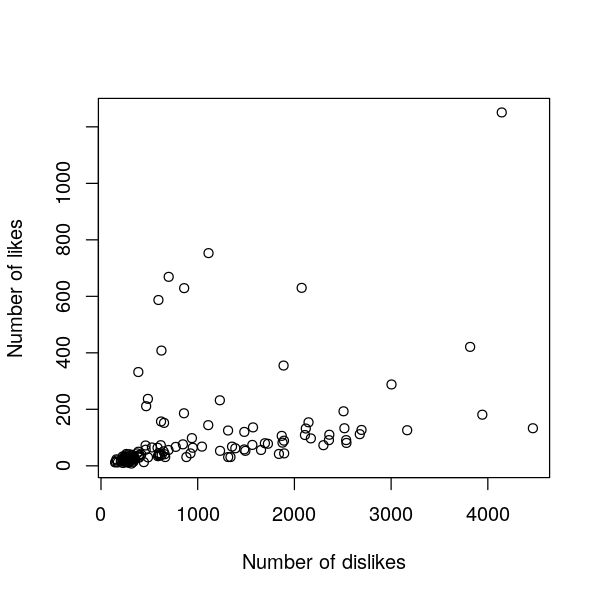

In [43]:
# Dropping 2 outliers with a large number of likes/dislikes because they skew the plot
videolist_subset <- videolist[which(videolist$dislikeCount < 20000), ]

# Setting the size of the plot
options(repr.plot.width=5, repr.plot.height=5)

# Plotting relationship between likes and dislikes
plot(videolist_subset$likeCount, videolist_subset$dislikeCount, xlab = 'Number of dislikes', ylab = 'Number of likes')

## 2. Analyzing comments of videos

Video "Make america great again": https://www.youtube.com/watch?v=fXTA36HO65g&t

Video ID is 'fXTA36HO65g&t' (last numbers of the URL).

We will use the tab "Video Info":

* Insert video ID;
* Click "HTML Output'.

It gives 4 files, we are interested in the second (example of the file name: 'videoinfo_fXTA36HO65g&t_2019_04_22-21_31_24_comments.tab').

Save it as a 'youtube_comments.tab' in the working directory.

In [50]:
# Read the dataset
comments <- read.csv('youtube_comments.tab', header = TRUE, sep = '\t')

In [128]:
# Explore first few rows
head(comments)

id,replyCount,likeCount,publishedAt,authorName,text,authorChannelId,authorChannelUrl,isReply,isReplyTo,isReplyToName
UgyXRtgZgMQKIpSEVbV4AaABAg,0,0,2019-04-19 06:25:22,Dee W. C.,awesome sauce great video,UCNf35l0BCfI5XBqs4saIHFg,http://www.youtube.com/channel/UCNf35l0BCfI5XBqs4saIHFg,0,,
UgxlQLc7hUaeqgiRVV94AaABAg,0,1,2019-04-19 05:27:20,Kevin Breaker,first class job🇺🇲👍👍😎,UCxV1xwuajoCovNzSCQjGgug,http://www.youtube.com/channel/UCxV1xwuajoCovNzSCQjGgug,0,,
UgwWAhdHLeoqTQEYb2V4AaABAg,0,0,2019-04-19 03:49:05,Allen Boyden,im telling needs king trump,UCyzOkxkNqreMZNaRFPNzikQ,http://www.youtube.com/channel/UCyzOkxkNqreMZNaRFPNzikQ,0,,
UgxtkkYC5e65naV1pCl4AaABAg,0,0,2019-04-19 01:02:23,David Hickey,dems got nothing,UCkcl7y4wn2BB1MxvP3efCWA,http://www.youtube.com/channel/UCkcl7y4wn2BB1MxvP3efCWA,0,,
UgyG_MjdOYXx7eAnEh14AaABAg,0,0,2019-04-18 23:33:28,Kai Parker,👏 o 👏 m 👏 g 👏,UCu2oXr6fILbnMMXW4DflbxA,http://www.youtube.com/channel/UCu2oXr6fILbnMMXW4DflbxA,0,,
UgxHoDNghoPjMwHHBah4AaABAg,0,0,2019-04-18 22:48:48,Ryan P,president trump way,UCZsy42lqoRYfhGEiKIW2IZA,http://www.youtube.com/channel/UCZsy42lqoRYfhGEiKIW2IZA,0,,


In [130]:
## We will analyse 'text' column that contains text of the comment

# Before text analysis, we need to do some cleaning
comments$text <- as.character(comments$text) # to make sure that this column is text
comments$text <- tolower(comments$text) # transform to lower case
comments$text <- removeNumbers(comments$text) # remove numbers
comments$text <- removePunctuation(comments$text) # remove punctuation
comments$text <- stripWhitespace(comments$text) # strip extra white spaces
comments$text <- removeWords(comments$text, stopwords("english")) # remove stop words: a, and, also, the, etc.

In [139]:
# Turn into corpus
corpus <- Corpus(VectorSource(comments$text)) 

# Create Document Term Matrix from the corpus
# Document Term Matrix is the matrix that lists all occurrences of words in the corpus
dtm <- DocumentTermMatrix(corpus)

In [141]:
# Show terms 1000 through 1005 in the first two rows of the DTM
inspect(dtm[1:2,1000:1005])

<<DocumentTermMatrix (documents: 2, terms: 6)>>
Non-/sparse entries: 0/12
Sparsity           : 100%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs follower forces foriegn gang genocide globally
   1        0      0       0    0        0        0
   2        0      0       0    0        0        0


In [143]:
# Show the frequency of each word among all comments
freq <- colSums(as.matrix(dtm))
freq

awesome 
                                                                                                          7 
                                                                                                      great 
                                                                                                         48 
                                                                                                      sauce 
                                                                                                          1 
                                                                                                      video 
                                                                                                          4 
                                                                                                      class 
                                                                                                          2 
                                                                                                      first 
                                                                                                         14 
                                                                                                   job🇺🇲👍👍😎 
                                                                                                          1 
                                                                                                       king 
                                                                                                          1 
                                                                                                      needs 
                                                                                                          3 
                                                                                                    telling 
                                                                                                          3 
                                                                                                      trump 
                                                                                                        194 
                                                                                                       dems 
                                                                                                          4 
                                                                                                        got 
                                                                                                         13 
                                                                                                    nothing 
                                                                                                          8 
                                                                                                          👏 
                                                                                                          5 
                                                                                                  president 
                                                                                                        119 
                                                                                                        way 
                                                                                                          8 
                                                                                                        guy 
                                                                                                          3 
                                                                                                        age 
                                                                   

In [176]:
# Sort words and frequency values
ord <- order(freq,decreasing=TRUE)

# Inspect the most often used words
freq[head(ord)]

trump president   america      will       god     great 
      194       119        82        57        53        48

In [146]:
# Inspect the least often used words
freq[tail(ord)] 

bleed   beastly     gamer brilliant        👍🏼    bebong 
        1         1         1         1         1         1

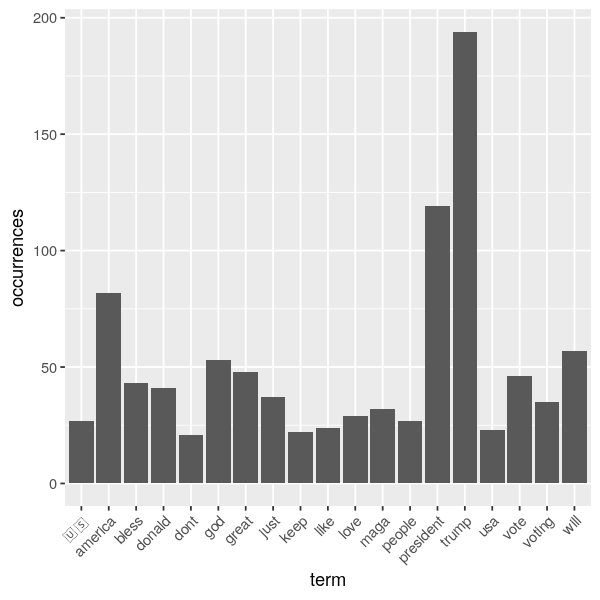

In [168]:
# Plotting the frequency of words

wf = data.frame(term=names(freq),occurrences=freq) # create a dataframe from 'freq' object

p <- ggplot(subset(wf, freq>20), aes(term, occurrences)) # plot words that occur more than 20 times
p <- p + geom_bar(stat='identity')
p <- p + theme(axis.text.x=element_text(angle=45, hjust=1))
p

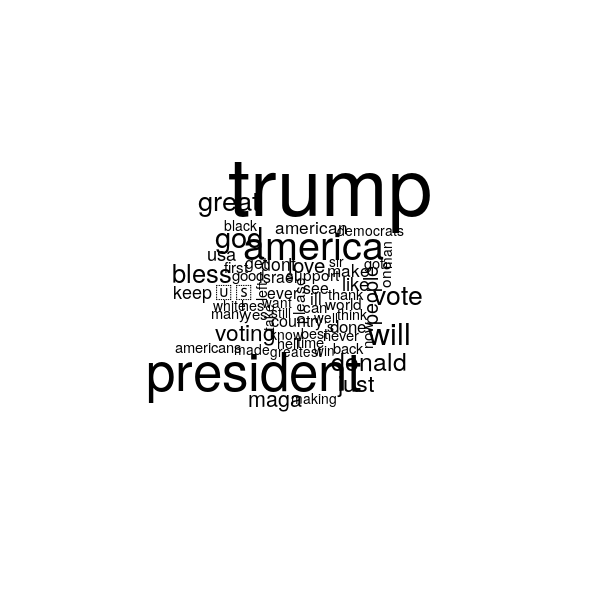

In [180]:
# Plot a wordcloud of the most frequent terms

set.seed(8) # set a seed to have the same plot all the time
wordcloud(names(freq),freq, min.freq=10)

In [150]:
# Find words that often appear together
findAssocs(dtm, c("god"), corlimit=0.7) # specifying a correlation limit

# If words always appear together, then correlation=1.0.

# 'god' usually co-occur with 'bless'

$god
bless 
 0.85

In [158]:
# 'obama' co-occur with the following words

findAssocs(dtm, c("obama"), corlimit=0.6)

$obama
       say     racist       sent government       said 
      0.75       0.75       0.71       0.67       0.62

In [163]:
# 'putin' co-occur with the following words
findAssocs(dtm, c("putin"), corlimit=0.6)

$putin
 caption     clip football  include   passed     cool 
    1.00     1.00     1.00     1.00     1.00     0.71

## 3. Network of commentators

Youtube Data Tools gives some files in .gdf format.

For example, 'Video Info' tab returns comment network in .gdf.

This is a network format. R can't open these files easily.

Free software for visualization and analysis of networks is Gephi: https://gephi.org/.

Gephi can open this file as network.

In [ ]:
# Read youtube_comment_network.gdf in Gephi

## 4. Exercises

* Take a video from Obama's channel, compare text of comments with a video from Trump's channel.

* Explore the most popular words used in video descriptions. Look at their relationship with video characteristics.

* Explore the relationships between the duration of videos (column 'durationSec') and other characteristics of videos.